In [52]:
# Data analysis
import pandas as pd
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Data manipulation
import numpy as np
# Sklearn
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits

# Section 0: Data analysis
Getting a good look at the data, seeing what is found inside, and most importantly, checking for NULL values. 

In [53]:
# load the CSV data into a DataFrame
df = pd.read_csv('Phishing_Email.csv')

In [54]:
# Look at header data
df.head(n=10)

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email
5,5,global risk management operations sally congra...,Safe Email
6,6,"On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint...",Safe Email
7,7,"entourage , stockmogul newsletter ralph velez ...",Phishing Email
8,8,"we owe you lots of money dear applicant , afte...",Phishing Email
9,9,re : coastal deal - with exxon participation u...,Safe Email


In [55]:
# look at features 
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [56]:
# count of safe emails in the dataset and count of phishing emails in the dataset
df['Email Type'].value_counts()

Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

In [57]:
# check for null values in all columns
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [58]:
# Print all emails with blank text 
df[df['Email Text'].isnull()]

,Unnamed: 0,Email Text,Email Type
31,31,NaN,Phishing Email
387,387,NaN,Phishing Email
1883,1883,NaN,Phishing Email
2049,2049,NaN,Phishing Email
2451,2451,NaN,Phishing Email
2972,2972,NaN,Phishing Email
3627,3627,NaN,Phishing Email
3806,3806,NaN,Phishing Email
5763,5763,NaN,Phishing Email
6299,6299,NaN,Phishing Email


In [59]:
df.dropna(subset=["Email Text"], inplace = True) #remove blank text emails
df[df['Email Text'].isnull()] #check if there are any blank text emails
# check for null values in all columns
df.isnull().sum()

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64

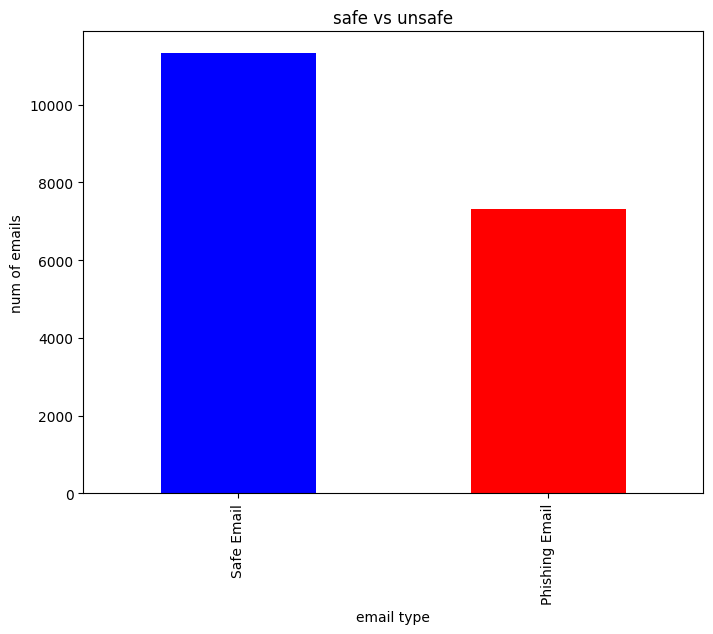

In [60]:
email_type = df['Email Type'].value_counts()

plt.figure(figsize=(8, 6))
email_type.plot(kind='bar', color=['blue', 'red'])
plt.title('safe vs unsafe')
plt.xlabel('email type')
plt.ylabel('num of emails')
plt.show()

In [61]:
target = df[df["Email Type"] == "Phishing Email"]


# Section 1: Data prep

In [62]:
# Convert email type to boolean 
dict = {
    "Phishing Email" : True,
    "Safe Email" : False
}
target = df["Email Type"]
target.map(dict)
df["Email Type"] = df["Email Type"].map(dict)

In [63]:
# Convert Strings to float values for KNN training 
count = CountVectorizer()
input = count.fit_transform(df['Email Text'])

# Section 2: KNN 

In [64]:
KNeighborsClassifier(n_neighbors=5, weights='uniform')
X_train, X_test, y_train, y_test = train_test_split(input, target, random_state=11, test_size=0.75)
#define knn from the KNeighborsClassifier function defined in the sklearn.neighbors module
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [65]:
predicted = knn.predict(X=X_test)
expected = y_test
predicted[:20]

array(['Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email'],
      dtype=object)

In [66]:
# (predicted and expected), if predicted does not = expected.
wrong =[(p,e) for (p,e) in zip(predicted, expected) if p !=e]

In [67]:
print("Model accuracy:%.2f%%" %(knn.score(X_test,y_test)*100))

Model accuracy:84.22%


In [68]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[4702,  770],
       [1436, 7068]])

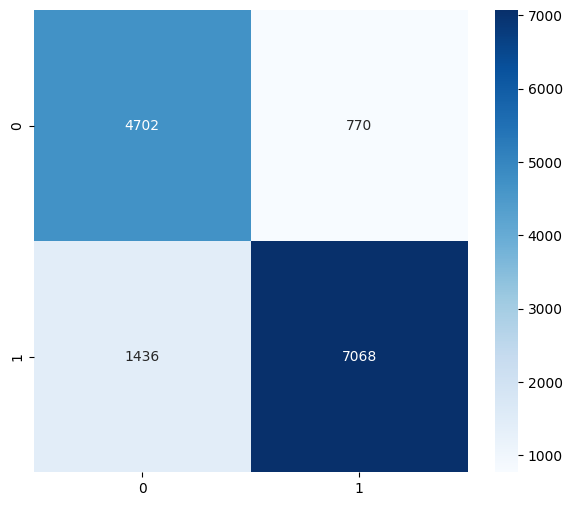

In [69]:
# Better visualziation of the confusion matrix using the seaborn library
confusion_df = pd.DataFrame(confusion,
index=range(2), columns=range(2))
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True,
cmap="Blues", fmt="d", )

# Section 3: Utilizing SVC

In [70]:

X_train, X_test, y_train, y_test = train_test_split(input, target, random_state=13, test_size=0.99)
#define knn from the KNeighborsClassifier function defined in the sklearn.neighbors module
svc = SVC()
svc.fit(X=X_train, y=y_train)

SVC()

In [71]:
print("Model accuracy:%.2f%%" %(svc.score(X_test,y_test)*100))

Model accuracy:63.58%


In [72]:
svc_predicted = svc.predict(X=X_test)
svc_expected = y_test
predicted[:20]

array(['Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Phishing Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email',
       'Safe Email', 'Safe Email', 'Safe Email', 'Phishing Email'],
      dtype=object)

In [73]:
confusion = confusion_matrix(y_true=svc_expected, y_pred=svc_predicted)
confusion

array([[  541,  6699],
       [   20, 11188]])

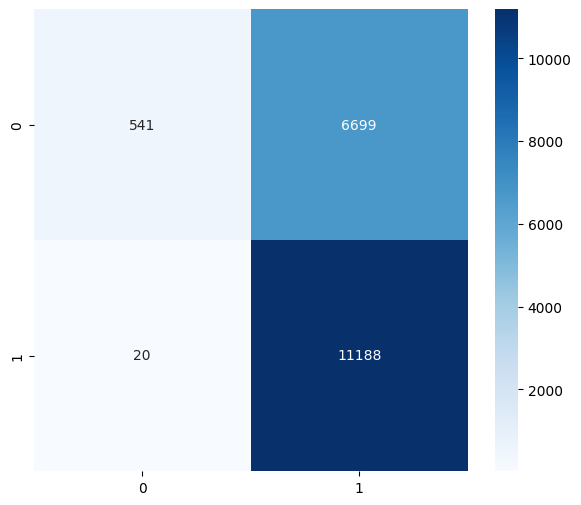

In [74]:
# Better visualziation of the confusion matrix using the seaborn library
confusion_df = pd.DataFrame(confusion,
index=range(2), columns=range(2))
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True,
cmap="Blues", fmt="d", )